<a href="https://colab.research.google.com/github/zahrasa/Detection-and-Classification-of-Distributed-DoS-Attacks-using-Machine-Learning/blob/master/preprocessing_ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
%%capture

import os
import glob
import numpy as np
import pandas as pd


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Preprocessing


## Download ddos dataset zip

In [4]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Download the dataset
! rm -rf * 
! gdown 1u_PKRu5rr69GBiR-zrgbfopmObINmLwm

Downloading...
From: https://drive.google.com/uc?id=1u_PKRu5rr69GBiR-zrgbfopmObINmLwm
To: /content/ddos_2019.zip
100% 894M/894M [00:12<00:00, 72.4MB/s]


In [6]:
! unzip "ddos_2019.zip"
! rm -r "ddos_2019.zip"

Archive:  ddos_2019.zip
  inflating: MSSQL.csv               
  inflating: NetBIOS.csv             
  inflating: Portmap.csv             
  inflating: Syn.csv                 
  inflating: UDP.csv                 
  inflating: UDPLag.csv              
  inflating: LDAP.csv                


In [7]:
# list csv names in zip
csvlist=os.listdir('/content/')
for f in csvlist[:]: # filelist[:] makes a copy of filelist.
    if not(f.endswith(".csv")):
        csvlist.remove(f)

print('csv names:', csvlist)
print('number of csv files:', len(csvlist))

csv names: ['MSSQL.csv', 'LDAP.csv', 'Syn.csv', 'Portmap.csv', 'NetBIOS.csv', 'UDP.csv', 'UDPLag.csv']
number of csv files: 7


## Downsampling

In [ ]:
for j in range(len(csvlist)):

  # Split huge .csv
  for i,chunk in enumerate(pd.read_csv(csvlist[j], chunksize=200000)):
    chunk.to_csv('chunk{}.csv'.format(j), index=False)
    df = pd.read_csv('chunk{}.csv'.format(j))

    # min size all 7 csv is 191694
    df = df.iloc[:191694,]
    df.to_csv('chunk{}.csv'.format(j))

    break

  # Print info
  print('{} is sampled'.format(csvlist[j]))


UDP.csv is sampled
Portmap.csv is sampled
Syn.csv is sampled
UDPLag.csv is sampled
LDAP.csv is sampled
MSSQL.csv is sampled
NetBIOS.csv is sampled


In [ ]:
# Remove dataset .csv to make RAM free 
for j in range(len(csvlist)):
  os.remove(os.path.join('/content/', csvlist[j]))

In [ ]:
# Merge the sampled csv files

# A list of all joined files is returned
joined_files = os.path.join('/content/', 'chunk*.csv')
joined_list = glob.glob(joined_files)

# Merge the files
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df.to_csv('ddos.csv')

In [ ]:
# Remove chunk*.csv to make RAM free 
for filename in glob.glob('/content/chunk*.csv'):
    os.remove(filename) 

In [ ]:
df = pd.read_csv('ddos.csv')

## Drop unnamed columns

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,1,1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,2,2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
3,3,3,16171,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
4,4,4,80845,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [ ]:
# Drop out unnamed columns
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['Unnamed: 0.1'], axis=1)
df = df.drop(['Unnamed: 0.1.1'], axis=1)

In [ ]:
print("ddos csv shape: ",df.shape)

ddos csv shape:  (1341858, 87)


## Drop null and inf

In [ ]:
# Replace infinite data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Count rows with missing value
pd.options.display.min_rows = 500
print('Number of missing values:', df.isnull().sum().sum(), '\n\n')
df.isnull().sum()

Number of missing values: 113156 




Flow ID                             0
 Source IP                          0
 Source Port                        0
 Destination IP                     0
 Destination Port                   0
 Protocol                           0
 Timestamp                          0
 Flow Duration                      0
 Total Fwd Packets                  0
 Total Backward Packets             0
Total Length of Fwd Packets         0
 Total Length of Bwd Packets        0
 Fwd Packet Length Max              0
 Fwd Packet Length Min              0
 Fwd Packet Length Mean             0
 Fwd Packet Length Std              0
Bwd Packet Length Max               0
 Bwd Packet Length Min              0
 Bwd Packet Length Mean             0
 Bwd Packet Length Std              0
Flow Bytes/s                    56578
 Flow Packets/s                 56578
 Flow IAT Mean                      0
 Flow IAT Std                       0
 Flow IAT Max                       0
 Flow IAT Min                       0
Fwd IAT Tota

In [ ]:
# replacing missing values in column
# with median of that column
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].median())

In [ ]:
# replacing missing values in column
# with median of that column
df[' Flow Packets/s'] = df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].median())

In [ ]:
# Count rows with missing value
pd.options.display.min_rows = 500
print('Number of missing values:', df.isnull().sum().sum(), '\n\n')
df.isnull().sum()

Number of missing values: 0 




Flow ID                         0
 Source IP                      0
 Source Port                    0
 Destination IP                 0
 Destination Port               0
 Protocol                       0
 Timestamp                      0
 Flow Duration                  0
 Total Fwd Packets              0
 Total Backward Packets         0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Max          0
 Fwd Packet Length Min          0
 Fwd Packet Length Mean         0
 Fwd Packet Length Std          0
Bwd Packet Length Max           0
 Bwd Packet Length Min          0
 Bwd Packet Length Mean         0
 Bwd Packet Length Std          0
Flow Bytes/s                    0
 Flow Packets/s                 0
 Flow IAT Mean                  0
 Flow IAT Std                   0
 Flow IAT Max                   0
 Flow IAT Min                   0
Fwd IAT Total                   0
 Fwd IAT Mean                   0
 Fwd IAT Std                    0
 Fwd IAT Max  

In [ ]:
# # Remove missing values:
# df = df.dropna()
# df.reset_index(drop=True, inplace=True)
print("ddos csv shape = ",df.shape)

ddos csv shape =  (1341858, 87)


## Drop zero columns

In [ ]:
# Count zero columns
zero_cols=[]
for i in range(len(df.columns)):
  if (df[df.columns[i]] == 0).all():
    print(df.columns[i])
    zero_cols.append(df.columns[i])

print('\nnumber of zero columns = ', len(zero_cols))

 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
FIN Flag Count
 PSH Flag Count
 ECE Flag Count
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate

number of zero columns =  12


In [ ]:
# Remove zero columns [variation(std) == 0]
for i in range(len(zero_cols)):
  df=df.drop(zero_cols[i],axis=1)

In [ ]:
print("ddos csv shape: ",df.shape)

ddos csv shape:  (1341858, 75)


## Handeling object type in columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341858 entries, 0 to 1341857
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Flow ID                       1341858 non-null  object 
 1    Source IP                    1341858 non-null  object 
 2    Source Port                  1341858 non-null  int64  
 3    Destination IP               1341858 non-null  object 
 4    Destination Port             1341858 non-null  int64  
 5    Protocol                     1341858 non-null  int64  
 6    Timestamp                    1341858 non-null  object 
 7    Flow Duration                1341858 non-null  int64  
 8    Total Fwd Packets            1341858 non-null  int64  
 9    Total Backward Packets       1341858 non-null  int64  
 10  Total Length of Fwd Packets   1341858 non-null  float64
 11   Total Length of Bwd Packets  1341858 non-null  float64
 12   Fwd Packet Length Max      

### Handeling labels

In [ ]:
df = df.rename(columns={" Label": "Label"})

In [ ]:
(df['Label'].value_counts()) / len(df) * 100

NetBIOS    28.556151
UDP        20.721939
Syn        19.757679
MSSQL      15.332770
Portmap    13.932920
BENIGN      0.818865
LDAP        0.740093
UDPLag      0.139583
Name: Label, dtype: float64

In [ ]:
df['Label'].value_counts()

NetBIOS    383183
UDP        278059
Syn        265120
MSSQL      205744
Portmap    186960
BENIGN      10988
LDAP         9931
UDPLag       1873
Name: Label, dtype: int64

In [ ]:
# df.columns
df.Label.unique()
df['Label'] = df['Label'].replace('BENIGN', '0')
df['Label'] = df['Label'].replace('NetBIOS', '1')
df['Label'] = df['Label'].replace('LDAP', '2')
df['Label'] = df['Label'].replace('MSSQL', '3')
df['Label'] = df['Label'].replace('Portmap', '4')
df['Label'] = df['Label'].replace('Syn', '5')
df['Label'] = df['Label'].replace('UDP', '6')
df['Label'] = df['Label'].replace('UDPLag', '7')
df['Label'] = df['Label'].astype('int')
df.Label.unique()

array([1, 0, 2, 3, 6, 7, 5, 4])

In [ ]:
df['Label'].value_counts()

1    383183
6    278059
5    265120
3    205744
4    186960
0     10988
2      9931
7      1873
Name: Label, dtype: int64

### Handeling SimillarHTTP


In [ ]:
print('num = ',len(df['SimillarHTTP'].unique()))

num =  89


In [ ]:
# Count unique values in HTTP column
df['SimillarHTTP'].value_counts()

0                                                                                                                                                                                                                                                                           1251746
0                                                                                                                                                                                                                                                                             89777
ocsp.pki.goog/GTSGIAG3                                                                                                                                                                                                                                                           61
ocsp.digicert.com/                                                                                                                                                          

In [ ]:
# Cast all values to string
df['SimillarHTTP'] = df['SimillarHTTP'].astype(str)

In [ ]:
# Any unique value turns to one int
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.SimillarHTTP)
df['SimillarHTTP'] = le.transform(df.SimillarHTTP)


In [ ]:
df['SimillarHTTP'].value_counts()

0     1341523
44         61
40         33
39         21
41         20
10         12
18          9
25          8
16          8
45          7
66          6
20          6
67          5
17          5
59          5
14          4
36          4
43          4
70          4
85          4
61          4
84          4
68          3
32          3
33          3
1           3
81          3
37          3
23          3
22          2
       ...   
8           1
4           1
47          1
60          1
28          1
11          1
9           1
27          1
64          1
77          1
34          1
35          1
51          1
30          1
49          1
29          1
50          1
54          1
62          1
80          1
75          1
76          1
31          1
87          1
78          1
2           1
72          1
73          1
7           1
26          1
Name: SimillarHTTP, Length: 88, dtype: int64

In [ ]:
print('num = ',len(df['SimillarHTTP'].unique()))

num =  88


In [ ]:
type(df['SimillarHTTP'][0])

numpy.int64

### Handeling flow ID

In [ ]:
df['Flow ID'][0]

'172.16.0.5-192.168.50.4-870-2908-17'

In [ ]:
df[' Source IP'][0]

'172.16.0.5'

In [ ]:
df[' Destination IP'][0]

'192.168.50.4'

In [ ]:
df[' Source Port'][0]

870

In [ ]:
df[' Destination Port'][0]

2908

In [ ]:
# Remove Flow ID becuse its redundant, as shown above
df=df.drop('Flow ID', axis=1)

In [ ]:
print("ddos csv shape: ",df.shape)

ddos csv shape:  (1341858, 74)


### Handeling IP by converting to decimal

In [ ]:
!pip install netaddr
import netaddr

     |████████████████████████████████| 1.9 MB 4.8 MB/s 


In [ ]:
# Example
print(int(netaddr.IPAddress('192.168.4.54'))) 

3232236598


Source IP

In [ ]:
# Converte source and destination ip address to decimal

ips = df[' Source IP'].unique()
l = len(ips)
print('strating loop, length is',l)
for i in range(l):
  df[' Source IP'] = df[' Source IP'].replace(ips[i], int(netaddr.IPAddress(ips[i])))
print('loop over')


strating loop, length is 366
loop over


In [ ]:
df = df.rename(columns={" Source IP": "SourceIP"})

In [ ]:
df['SourceIP'].value_counts()

2886729733    1328455
3232248326       3746
3232248328       3258
3232248324       2456
3232248329       1661
1255206059        214
2892618691        111
3232248573         50
3232248574         50
3715789631         49
1209359133         48
1747219313         40
134610945          38
2061595595         38
878009038          36
2899905734         30
2899905698         27
1168955503         26
2899904258         25
2899904994         24
398626517          24
878008826          24
2892613613         23
0                  23
1887005486         20
3627736034         20
2062947534         20
1218965487         20
2892507440         19
2899904194         18
               ...   
2915224941          1
1746646102          1
2899904996          1
597898614           1
2915189868          1
3092699603          1
398626041           1
3432673146          1
878008652           1
876258050           1
1746646358          1
2899905162          1
921949866           1
877944531           1
316021969 

In [ ]:
# Any unique value turns to one int
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.SourceIP)
df['SourceIP'] = le.transform(df.SourceIP)

In [ ]:
df['SourceIP'].value_counts()

224    1328455
325       3746
327       3258
324       2456
328       1661
166        214
230        111
329         50
330         50
365         49
158         48
183         40
1           38
202         38
118         36
300         30
294         27
157         26
262         25
264         24
39          24
117         24
229         23
0           23
197         20
363         20
205         20
159         20
226         19
253         18
        ...   
311          1
180          1
266          1
65           1
306          1
319          1
36           1
349          1
110          1
90           1
181          1
282          1
145          1
100          1
11           1
4            1
13           1
341          1
127          1
102          1
52           1
57           1
103          1
136          1
336          1
154          1
199          1
121          1
209          1
185          1
Name: SourceIP, Length: 366, dtype: int64

In [ ]:
type(df['SourceIP'][0])

numpy.int64

Destination IP

In [ ]:
ips = df[' Destination IP'].unique()
l = len(ips)
print('strating loop, length is',l)
for i in range(l):
  df[' Destination IP'] = df[' Destination IP'].replace(ips[i], int(netaddr.IPAddress(ips[i])))
print('loop over')


strating loop, length is 433
loop over


In [ ]:
df = df.rename(columns={" Destination IP": "DestinationIP"})

In [ ]:
df['DestinationIP'].value_counts()

3232248324    1328465
67240452         2772
2886729733       2415
3232248329        814
134744072         708
1255206059        686
3232248328        680
3232248326        597
2892618691        154
3715789631        121
1209359133        111
3758096389        100
2899904994         96
2899904258         93
878009038          84
2061595595         78
3627736034         74
2899905250         72
2899903142         66
2899904194         59
1218965487         59
2899905698         58
3232238130         57
2899905734         56
2899905122         55
398626517          51
3627736002         49
2899903150         49
2899904225         46
2899905286         43
               ...   
2899905347          1
399204946           1
1072786536          1
1209359174          1
2899904232          1
874893196           1
874566085           1
600392495           1
1822538880          1
1750598432          1
315879842           1
586038221           1
1249343363          1
1249343311          1
1539136413

In [ ]:
# Any unique value turns to one int
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.DestinationIP)
df['DestinationIP'] = le.transform(df.DestinationIP)

In [ ]:
df['DestinationIP'].value_counts()

383    1328465
0         2772
268       2415
387        814
2          708
199        686
386        680
384        597
274        154
426        121
187        111
427        100
311         96
309         93
137         84
245         78
424         74
331         72
284         66
297         59
189         59
345         58
382         57
354         56
328         55
48          51
422         49
287         49
299         46
337         43
        ...   
343          1
51           1
171          1
188          1
304          1
100          1
96           1
81           1
233          1
221          1
16           1
75           1
193          1
191          1
203          1
183          1
306          1
162          1
4            1
173          1
190          1
256          1
375          1
29           1
152          1
106          1
8            1
12           1
80           1
226          1
Name: DestinationIP, Length: 433, dtype: int64

In [ ]:
type(df['DestinationIP'][0])

numpy.int64

### handeling Timestamp

In [ ]:
len(df[' Timestamp'])

1341858

In [ ]:
df[' Timestamp'] = pd.to_datetime(df[' Timestamp']).dt.strftime(date_format = '%y-%m-%d %I:%M:%S %p')

In [ ]:
# Example
df[' Timestamp'][1]

'18-11-03 10:09:00 AM'

In [ ]:
# Handel timestamp by spliting to year, month, day, hour and minutes columns

y=[]
m=[]
d=[]
h=[]
mi=[]
for i in range(len(df[' Timestamp'])):

  # year
  a = int(df[' Timestamp'][i][0:2])
  y.append(a)
  
  # month
  b = int(df[' Timestamp'][i][3:5])
  m.append(b)
  
  # day
  c = int(df[' Timestamp'][i][6:8])
  d.append(c)

  # hour format 24h
  e = int(df[' Timestamp'][i][9:11])
  # AM PM
  z = (df[' Timestamp'][i][-2:])
  if z=='PM':
    e = e + 12
  h.append(e)

  # minutes
  f = int(df[' Timestamp'][i][12:14])
  mi.append(f)

In [ ]:
# year
y = pd.DataFrame(y)
y.describe()

,0
count,1341858.0
mean,18.0
std,0.0
min,18.0
25%,18.0
50%,18.0
75%,18.0
max,18.0


In [ ]:
# month
m = pd.DataFrame(m)
m.describe()

,0
count,1341858.0
mean,11.0
std,0.0
min,11.0
25%,11.0
50%,11.0
75%,11.0
max,11.0


In [ ]:
# day
d = pd.DataFrame(d)
d.describe()

,0
count,1341858.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


In [ ]:
# hour
h = pd.DataFrame(h)
h.describe()

,0
count,1.341858e+06
mean,1.028139e+01
std,4.592013e-01
min,9.000000e+00
25%,1.000000e+01
50%,1.000000e+01
75%,1.100000e+01
max,1.100000e+01


In [ ]:
# minutes
mi = pd.DataFrame(mi)
mi.describe()

,0
count,1.341858e+06
mean,2.102478e+01
std,1.913499e+01
min,0.000000e+00
25%,1.000000e+00
50%,9.000000e+00
75%,3.600000e+01
max,5.900000e+01


In [ ]:
# Add to df as a new column if std != 0

# df['year'] = y
# df['month'] = m
# df['day'] = d
df['hour'] = h
df['minute'] = mi

In [ ]:
df = df.drop(' Timestamp',axis=1)

In [ ]:
print("ddos csv shape: ",df.shape)

ddos csv shape:  (1341858, 75)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341858 entries, 0 to 1341857
Data columns (total 75 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SourceIP                      1341858 non-null  int64  
 1    Source Port                  1341858 non-null  int64  
 2   DestinationIP                 1341858 non-null  int64  
 3    Destination Port             1341858 non-null  int64  
 4    Protocol                     1341858 non-null  int64  
 5    Flow Duration                1341858 non-null  int64  
 6    Total Fwd Packets            1341858 non-null  int64  
 7    Total Backward Packets       1341858 non-null  int64  
 8   Total Length of Fwd Packets   1341858 non-null  float64
 9    Total Length of Bwd Packets  1341858 non-null  float64
 10   Fwd Packet Length Max        1341858 non-null  float64
 11   Fwd Packet Length Min        1341858 non-null  float64
 12   Fwd Packet Length Mean     

## Outlier detection

In [ ]:
print('ddos csv shape: ', df.shape)

ddos csv shape:  (1341858, 75)


In [ ]:
df['Label'].value_counts()

1    383183
6    278059
5    265120
3    205744
4    186960
0     10988
2      9931
7      1873
Name: Label, dtype: int64

In [ ]:
# Split then drop out outlier s
df0 = df[df['Label'] == 0]
df1 = df[df['Label'] == 1]
df2 = df[df['Label'] == 2]
df3 = df[df['Label'] == 3]
df4 = df[df['Label'] == 4]
df5 = df[df['Label'] == 5]
df6 = df[df['Label'] == 6]
df7 = df[df['Label'] == 7]

In [ ]:
# Detect and drop out outliers with IQR in each df s
for i in range(8):

  data = locals()['df'+str(i)]
  print('\n\noutlier detection df', i)

  print('shape before outlier detection = ', data.shape)

  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1

  data.drop(data.index[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)], inplace=True)
  # Reset index
  data.reset_index(drop=True, inplace=True)

  print('shape after outlier detection = ', data.shape)



outlier detection df 0
shape before outlier detection =  (10988, 75)
shape after outlier detection =  (7950, 75)


outlier detection df 1
shape before outlier detection =  (383183, 75)
shape after outlier detection =  (167431, 75)


outlier detection df 2
shape before outlier detection =  (9931, 75)
shape after outlier detection =  (3383, 75)


outlier detection df 3
shape before outlier detection =  (205744, 75)
shape after outlier detection =  (111071, 75)


outlier detection df 4
shape before outlier detection =  (186960, 75)
shape after outlier detection =  (73569, 75)


outlier detection df 5
shape before outlier detection =  (265120, 75)
shape after outlier detection =  (164718, 75)


outlier detection df 6
shape before outlier detection =  (278059, 75)
shape after outlier detection =  (53392, 75)


outlier detection df 7
shape before outlier detection =  (1873, 75)
shape after outlier detection =  (977, 75)


In [ ]:
# Concat dfs
df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

# # Drop out unnamed columns
# df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,SourceIP,Source Port,DestinationIP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,hour,minute
0,327,60015,287,80,6,1,2,0,12.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,10,9
1,243,80,386,60015,6,47,2,0,12.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,1,0,10,9
2,327,60015,287,80,6,1,2,0,12.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,10,9
3,271,443,386,60007,6,8001234,4,0,0.0,0.0,...,1.0,8001232.0,0.000000e+00,8001232.0,8001232.0,0,1,0,10,9
4,325,55310,299,443,6,112729696,13,6,368.0,196.0,...,62155.0,56301460.5,3.535899e+06,58801719.0,53801202.0,0,0,0,10,9


In [ ]:
print('ddos csv shape: ', df.shape)

ddos csv shape:  (582491, 75)


In [ ]:
# Drop out columns with std = = 0 after droping outliers out
df = df.drop(df.std()[df.std() < 0.1].index.values, axis=1)

print('ddos csv shape: ', df.shape)

ddos csv shape:  (582491, 70)


In [ ]:
df['Label'].value_counts()

1    167431
5    164718
3    111071
4     73569
6     53392
0      7950
2      3383
7       977
Name: Label, dtype: int64

In [ ]:
df.head()

,SourceIP,Source Port,DestinationIP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,hour,minute
0,327,60015,287,80,6,1,2,0,12.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,10,9
1,243,80,386,60015,6,47,2,0,12.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,1,0,10,9
2,327,60015,287,80,6,1,2,0,12.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,10,9
3,271,443,386,60007,6,8001234,4,0,0.0,0.0,...,1.0,8001232.0,0.000000e+00,8001232.0,8001232.0,0,1,0,10,9
4,325,55310,299,443,6,112729696,13,6,368.0,196.0,...,62155.0,56301460.5,3.535899e+06,58801719.0,53801202.0,0,0,0,10,9


# Feature selection by correlation

In [ ]:
print('ddos csv shape = ', df.shape)
print('number of columns before feature selection:', len(df.columns), '\n')
df.columns

ddos csv shape =  (582491, 70)
number of columns before feature selection: 70 



Index(['SourceIP', ' Source Port', 'DestinationIP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' ACK Flag Cou

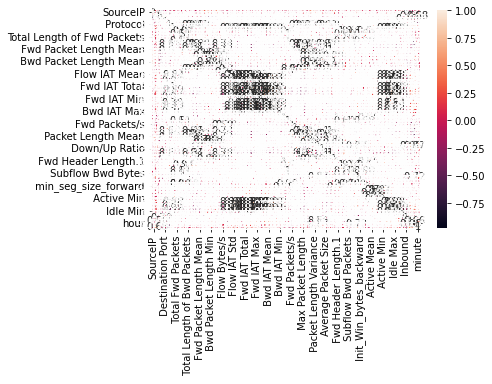

In [ ]:
# Create heatmap for determining correlation
import seaborn as sn
corr_mat=df.corr()
sn.heatmap(corr_mat, annot=True)

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print('possible number of columns to drop: ', len(to_drop))

possible number of columns to drop:  31


In [ ]:
# Drop features with correlation greater than 0.95
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
print('number of columns after feature selection:', len(df.columns), '\n')
df.columns

number of columns after feature selection: 39 



Index(['SourceIP', ' Source Port', 'DestinationIP', ' Destination Port',
       ' Protocol', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Min', ' Fwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Packet Length Std', ' Packet Length Variance', ' Down/Up Ratio',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', ' Idle Std',
       'SimillarHTTP', ' Inbound', 'Label', 'hour', 'minute'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582491 entries, 0 to 582490
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SourceIP                     582491 non-null  int64  
 1    Source Port                 582491 non-null  int64  
 2   DestinationIP                582491 non-null  int64  
 3    Destination Port            582491 non-null  int64  
 4    Protocol                    582491 non-null  int64  
 5    Flow Duration               582491 non-null  int64  
 6    Total Fwd Packets           582491 non-null  int64  
 7    Total Backward Packets      582491 non-null  int64  
 8   Total Length of Fwd Packets  582491 non-null  float64
 9    Fwd Packet Length Max       582491 non-null  float64
 10   Fwd Packet Length Std       582491 non-null  float64
 11  Bwd Packet Length Max        582491 non-null  float64
 12   Bwd Packet Length Min       582491 non-null  float64
 13 

In [ ]:
df.head()

,SourceIP,Source Port,DestinationIP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Std,SimillarHTTP,Inbound,Label,hour,minute
0,327,60015,287,80,6,1,2,0,12.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0,0,0,10,9
1,243,80,386,60015,6,47,2,0,12.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0,1,0,10,9
2,327,60015,287,80,6,1,2,0,12.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0,0,0,10,9
3,271,443,386,60007,6,8001234,4,0,0.0,0.0,...,1.0,0.000000,1.0,1.0,0.000000e+00,0,1,0,10,9
4,325,55310,299,443,6,112729696,13,6,368.0,46.0,...,62213.0,82.024387,62271.0,62155.0,3.535899e+06,0,0,0,10,9


In [ ]:
df.describe()

,SourceIP,Source Port,DestinationIP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Std,SimillarHTTP,Inbound,Label,hour,minute
count,582491.000000,582491.000000,582491.000000,582491.000000,582491.000000,5.824910e+05,582491.000000,582491.000000,582491.000000,582491.000000,...,5.824910e+05,5.824910e+05,5.824910e+05,5.824910e+05,5.824910e+05,582491.000000,582491.000000,582491.000000,582491.000000,582491.000000
mean,225.293893,24082.409496,381.106577,32560.920435,13.730767,5.901664e+06,3.532467,1.005700,674.995171,261.268208,...,2.569454e+04,3.640667e+04,7.009148e+04,4.109131e+03,5.997085e+05,0.023436,0.986369,3.351926,10.320197,21.773286
std,13.248418,24106.683766,20.376222,19135.608380,5.030588,1.645048e+07,44.966379,41.843967,1310.635858,262.416027,...,2.356005e+05,2.743877e+05,5.239395e+05,1.620065e+05,2.032566e+06,1.084370,0.115954,1.806592,0.482251,17.224063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000
25%,224.000000,770.000000,383.000000,15985.000000,6.000000,1.000000e+00,2.000000,0.000000,60.000000,6.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,10.000000,2.000000
50%,224.000000,17257.000000,383.000000,32620.000000,17.000000,4.600000e+01,2.000000,0.000000,458.000000,229.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,4.000000,10.000000,29.000000
75%,224.000000,47421.000000,383.000000,49199.000000,17.000000,9.000000e+01,2.000000,0.000000,804.000000,393.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,5.000000,11.000000,36.000000
max,365.000000,65532.000000,432.000000,65535.000000,17.000000,1.199975e+08,25274.000000,31700.000000,150934.000000,3617.000000,...,8.140801e+07,3.610598e+07,8.140801e+07,8.140801e+07,6.188006e+07,87.000000,1.000000,7.000000,11.000000,59.000000


# saving clean dataframe as csv in drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df.to_csv('/content/drive/MyDrive/clean_ddos.csv')

# Desicion Tree on clear csv to find important features

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import subprocess


sel_features = np.array(df.columns).tolist()
sel_features.remove('Label')

# Fit the decision tree with scikit-learn
y = df['Label']
X = df[sel_features]


dt = DecisionTreeClassifier(max_depth=10, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=99)

In [ ]:
# Visualize the tree
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

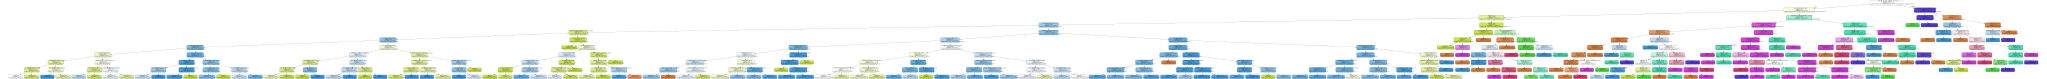

In [ ]:
# Visualize the tree
dot_data = tree.export_graphviz(dt, 
                  feature_names=sel_features,
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Save .png
graph.format = "png"
graph.render("decision_tree")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.868667 to fit


'decision_tree.png'